# Introduction

In this project, we will perform hierarchical clustering and principal components analysis on the USArrests dataset in R. The dataset contains information on the number of arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. The aim of this analysis is to identify clusters of states based on their crime rates.

We will begin by exploring the dataset and preparing it for clustering analysis. Then we will use the dendextend package to perform hierarchical clustering and visualize the results using a dendrogram. Finally, we will interpret the dendrogram and identify the clusters of states.

### Hierarchical Clustering

In [1]:
library("datasets")
library("dendextend")


---------------------
Welcome to dendextend version 1.16.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




In [2]:
data("USArrests")
head(USArrests)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


The dataset contains four variables: Murder, Assault, Rape, and UrbanPop. We will focus on the first three variables for clustering analysis.

#### Preprocess the data

In [2]:
# Standardize the variables
USArrests_std <- scale(USArrests[,1:3])

# Check the summary statistics of the standardized variables
summary(USArrests_std)

     Murder           Assault           UrbanPop       
 Min.   :-1.6044   Min.   :-1.5090   Min.   :-2.31714  
 1st Qu.:-0.8525   1st Qu.:-0.7411   1st Qu.:-0.76271  
 Median :-0.1235   Median :-0.1411   Median : 0.03178  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.7949   3rd Qu.: 0.9388   3rd Qu.: 0.84354  
 Max.   : 2.2069   Max.   : 1.9948   Max.   : 1.75892  

We standardize the variables to ensure that they are on the same scale and have equal weight in the clustering analysis. The summary statistics show that the variables have zero mean and unit variance.

#### Perform Hierarchical Clustering

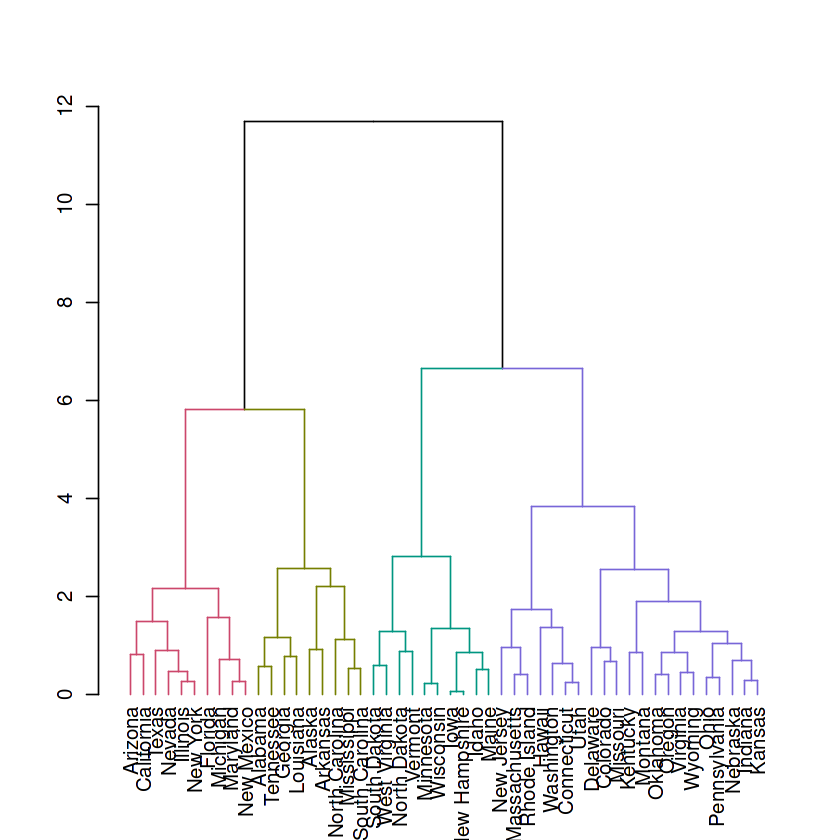

In [4]:
# Perform hierarchical clustering using Ward's method
hc <- hclust(dist(USArrests_std), method="ward.D2")

# Visualize the dendrogram
dend <- as.dendrogram(hc)
dend <- color_branches(dend, k=4)
plot(dend)

The dendrogram shows the hierarchical structure of the clusters. We color the branches according to the number of clusters we want to identify, which in this case is four.

In [5]:
# Cut the dendrogram to obtain the clusters
clusters <- cutree(hc, k=4)

# Add the cluster labels to the dataset
USArrests$cluster <- factor(clusters)

# Check the cluster sizes
table(clusters)

clusters
 1  2  3  4 
 9 10 21 10 

We cut the dendrogram to obtain the clusters and add the cluster labels to the dataset. The table shows the number of states in each cluster. 

In [6]:
# Create a list of state names by cluster
states_by_cluster <- split(names(clusters), clusters)

# Print the list of state names by cluster
cat("\n\033[1mStates in Cluster 1:\033[0m\n", paste(states_by_cluster[[1]], collapse=", "), "\n\n")
cat("\n\033[1mStates in Cluster 2:\033[0m\n", paste(states_by_cluster[[2]], collapse=", "), "\n\n")
cat("\n\033[1mStates in Cluster 3:\033[0m\n", paste(states_by_cluster[[3]], collapse=", "), "\n\n")
cat("\n\033[1mStates in Cluster 4:\033[0m\n", paste(states_by_cluster[[4]], collapse=", "), "\n\n")



States in Cluster 1:
 Alabama, Alaska, Arkansas, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee 


States in Cluster 2:
 Arizona, California, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas 


States in Cluster 3:
 Colorado, Connecticut, Delaware, Hawaii, Indiana, Kansas, Kentucky, Massachusetts, Missouri, Montana, Nebraska, New Jersey, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, Utah, Virginia, Washington, Wyoming 


States in Cluster 4:
 Idaho, Iowa, Maine, Minnesota, New Hampshire, North Dakota, South Dakota, Vermont, West Virginia, Wisconsin 



#### Visualization of the Clusters

In [7]:
library("ggplot2")
library("gridExtra")

In [8]:
# Create the charts for Murder, Assault and Rape
plot_1 <- ggplot(USArrests, aes(x=Murder, y=Assault, color=cluster)) +
              geom_point(size=3) +
              labs(x="Murder", y="Assault", title="Hierarchical Clustering of USArrests")

plot_2 <- ggplot(USArrests, aes(x=Rape, y=Assault, color=cluster)) +
              geom_point(size=3) +
              labs(x="Rape", y="Assault", title="Hierarchical Clustering of USArrests")

plot_3 <- ggplot(USArrests, aes(x=Rape, y=Murder, color=cluster)) +
              geom_point(size=3) +
              labs(x="Rape", y="Murder", title="Hierarchical Clustering of USArrests")

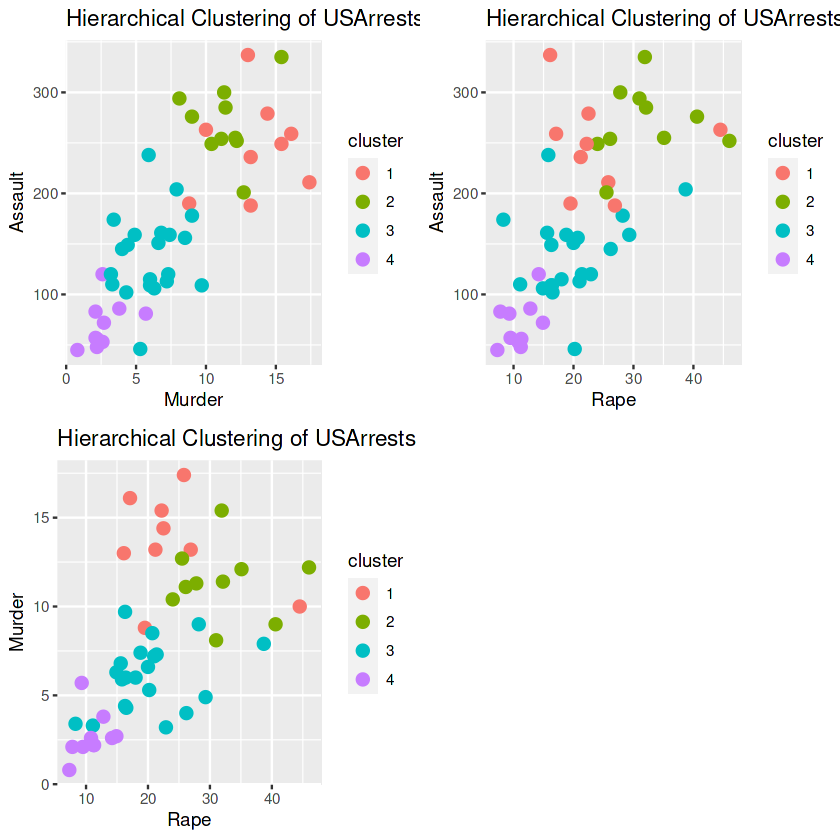

In [9]:
grid.arrange(plot_1, plot_2, plot_3, nrow=2)

First plot shows the clusters of states based on their Murder and Assault rates. It can be observed that clusters 1 and 2 have high rates of both Assault and Murder, cluster 3 has moderate rates of both variables, and cluster 4 has low rates of both variables.

The second plot shows the clusters of states based on their Murder and Assault rates. It can be observed that cluster 1 has more Assaults and Moderate rape rates, and cluster 2 have high rates of both Assault and Rape, cluster 3 has moderate rates of both variables with slightly more assault observations, and cluster 4 has low rates of both variables.

Third chart plots the Murder and Rape rates of the Clusters. It is seen that cluster 1 has the highest rates of Murder, while cluster 2 has the highest rates of Rape. Cluster 3 has moderate rates of both and cluster 4 has lowest of all.

### Principal Components

In [6]:
library("dplyr")
library("devtools")
install_github("vqv/ggbiplot")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: usethis




rlang   (1.0.6 -> 1.1.1) [CRAN]
cli     (3.6.0 -> 3.6.1) [CRAN]
vctrs   (0.5.2 -> 0.6.2) [CRAN]
pillar  (1.8.1 -> 1.9.0) [CRAN]
tibble  (3.1.8 -> 3.2.1) [CRAN]
gtable  (0.3.1 -> 0.3.3) [CRAN]
ggplot2 (3.4.1 -> 3.4.2) [CRAN]


Installing 7 packages: rlang, cli, vctrs, pillar, tibble, gtable, ggplot2

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘cli’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘gtable’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘pillar’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘tibble’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘ggplot2’ had non-zero exit status”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmphTNDhH/remotes214a8e21bc/vqv-ggbiplot-7325e88/DESCRIPTION’ ... OK
* preparing ‘ggbiplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ggbiplot_0.55.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: scales

Loading required package: grid



In [18]:
library("ggbiplot")

In [21]:
# Scale the data
USArrests_std_2 <- scale(USArrests)

In [23]:
# Perform PCA on the standardized data
pca <- prcomp(USArrests_std_2, scale=TRUE)
pca

Standard deviations (1, .., p=4):
[1] 1.5748783 0.9948694 0.5971291 0.4164494

Rotation (n x k) = (4 x 4):
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432

In [26]:
# Extract the scores of the principal components
scores <- pca$x
head(scores)

,PC1,PC2,PC3,PC4
Alabama,-0.9756604,1.1220012,-0.43980366,0.154696581
Alaska,-1.9305379,1.0624269,2.01950027,-0.434175454
Arizona,-1.7454429,-0.7384595,0.05423025,-0.826264240
Arkansas,0.1399989,1.1085423,0.11342217,-0.180973554
California,-2.4986128,-1.5274267,0.59254100,-0.338559240
Colorado,-1.4993407,-0.9776297,1.08400162,0.001450164


This code loads the USArrests dataset, scales the data, performs PCA on the standardized data, and extracts the scores of the first two principal components. 

Then, we will use ggbiplot to visualize the scores of the first two principal components and color codes the points based on the Murder variable. The ellipse and circle arguments add the confidence ellipse and the circle, respectively

In [27]:
# Plot the scores of the first two principal components using ggbiplot
ggbiplot(scores, labels=rownames(USArrests),
         groups=USArrests$Murder,
         ellipse=TRUE, circle=TRUE) +
  scale_color_gradient(low="blue", high="red") +
  ggtitle("Principal Component Analysis of USArrests dataset") +
  xlab(paste0("PC1 (", round(pca$sdev[1]/sum(pca$sdev)*100), "%)")) +
  ylab(paste0("PC2 (", round(pca$sdev[2]/sum(pca$sdev)*100), "%)"))

ERROR: Error in ggbiplot(scores, labels = rownames(USArrests), groups = USArrests$Murder, : Expected a object of class prcomp, princomp, PCA, or lda
